# **Домашнее задание 1**

Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import imageio

In [5]:
img = imageio.imread('cat.jpeg')
img = img.astype(np.float32) / 255.
print(img.shape)

(241, 209, 3)


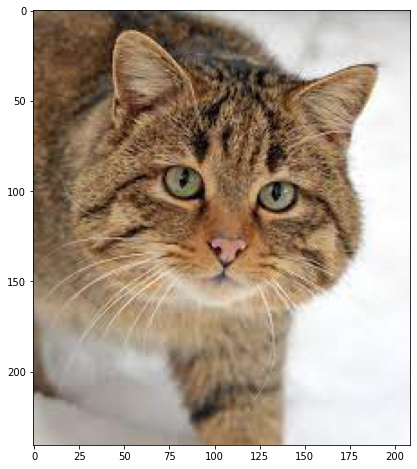

In [7]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

## Нелинейное уменьшение яркости

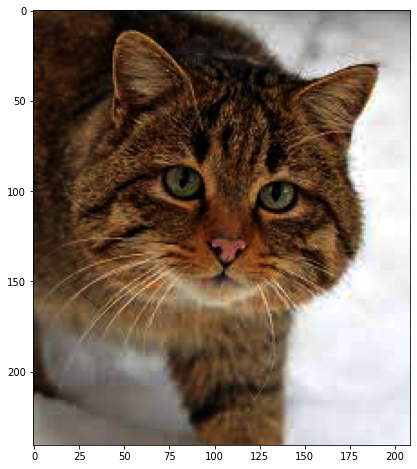

In [11]:
plt.figure(figsize=(8, 8))
plt.imshow(img**2)

## Получение ЧБ изображения по цветному

In [12]:
img_bw = np.mean(img, axis=2)

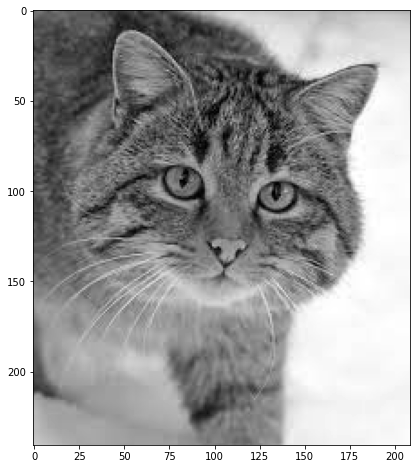

In [13]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bw, cmap='gray')

## Цветовое пространство HSV

In [14]:
from skimage.color import rgb2hsv, hsv2rgb

In [15]:
img_hsv = rgb2hsv(img)

## Изменение тона

In [29]:
img_hsv_new = np.copy(img_hsv)
img_hsv_new[:, :, 0] *= 4
img_new = hsv2rgb(img_hsv_new)

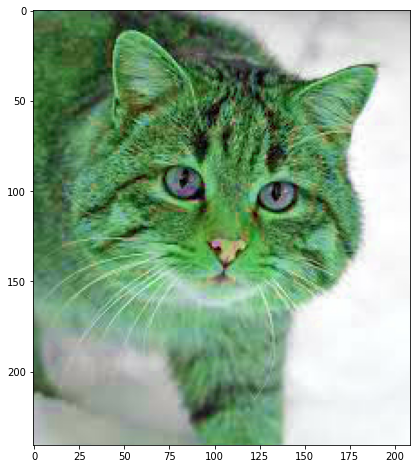

In [30]:
plt.figure(figsize=(8, 8))
plt.imshow(img_new)

## Бинаризация по порогу

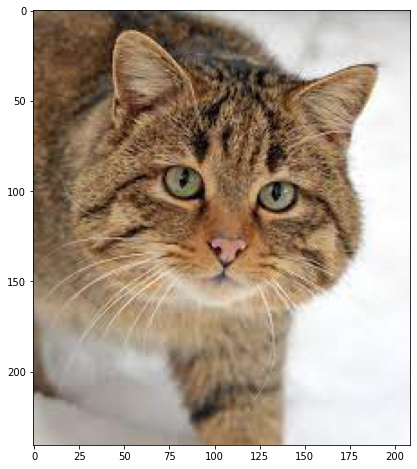

In [31]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [42]:
threshold = 0.65 # порог бинаризации
img_bw = np.mean(img, axis=2)
img_bin = (img_bw > threshold).astype(np.uint8)

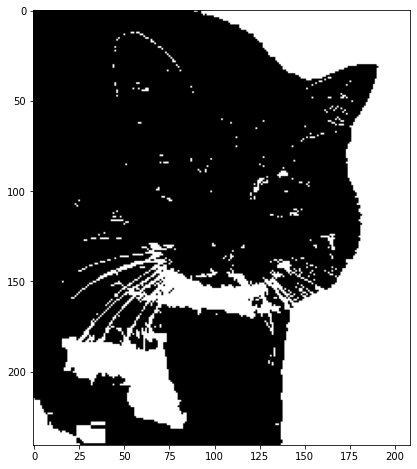

In [43]:
plt.figure(figsize=(8, 8))
plt.imshow(img_bin*255, cmap='gray')

## Свёртка цветного изображения

In [44]:
import scipy.signal

## Создание линейного фильтра (ядро свёртки)

In [46]:
# Gaussian blur
win_size = (11, 11)
sigma = 3
w = np.zeros(win_size, dtype=np.float32)
for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        w[i,j] = np.exp(-(i-w.shape[0]//2)**2 / sigma**2 / 2 
                        -(j-w.shape[1]//2)**2 / sigma**2 / 2)
w = w / np.sum(w)

In [47]:
%%time

out_img = []
for c in range(3):
    out_img.append(scipy.signal.correlate2d(img[:,:,c], w, mode='valid'))
out_img = np.stack(out_img, axis=2)

CPU times: user 61.6 ms, sys: 0 ns, total: 61.6 ms
Wall time: 66.3 ms


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


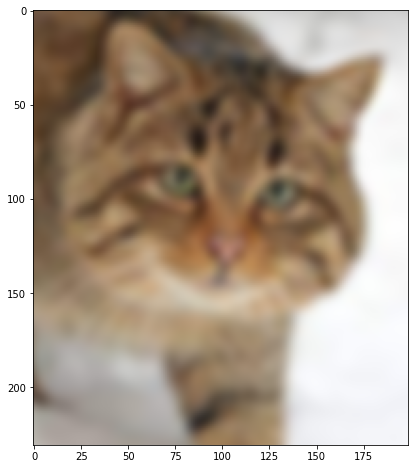

In [48]:
plt.figure(figsize=(8, 8))
plt.imshow(out_img)